# SE-2200E Notebook 5: Another Prediction

Ningsong Shen

March 9, 2021

## Summary

Decision trees are attempted with the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('../clean_data/sample_data.csv').drop_duplicates().sort_values(["trip_id", "start_date", "stop_sequence"], ignore_index=True)
df.head(50)

C:\Users\nings\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


trip_id  start_date route_id  stop_sequence  vehicle_id  \
0   1330705    20201105        4              1      3310.0   
1   1330705    20201105        4              2      3310.0   
2   1330705    20201105        4              3      3310.0   
3   1330705    20201105        4              4      3310.0   
4   1330705    20201105        4              5      3310.0   
5   1330705    20201105        4              6      3310.0   
6   1330705    20201105        4              7      3310.0   
7   1330705    20201105        4              8      3310.0   
8   1330705    20201105        4              9      3310.0   
9   1330705    20201105        4             10      3310.0   
10  1330705    20201105        4             11      3310.0   
11  1330705    20201105        4             12      3310.0   
12  1330705    20201105        4             13      3310.0   
13  1330705    20201105        4             14      3310.0   
14  1330705    20201105        4             15      3310.0   
15  1330705    20201106       04              1      3519.0   
16  1330705    20201106       04              2      3519.0   
17  1330705    20201106       04              3      3519.0   
18  1330705    20201106       04              4      3519.0   
19  1330705    20201106       04              5      3519.0   
20  1330705    20201106       04              6      3519.0   
21  1330705    20201106       04              7      3519.0   
22  1330705    20201106       04              8      3519.0   
23  1330705    20201106       04              9      3519.0   
24  1330705    20201106       04             10      3519.0   
25  1330705    20201106       04             11      3519.0   
26  1330705    20201106       04             12      3519.0   
27  1330705    20201106       04             13      3519.0   
28  1330705    20201106       04             14      3519.0   
29  1330705    20201106       04             15      3519.0   
30  1330705    20201109       04              1      3311.0   
31  1330705    20201109       04              2      3311.0   
32  1330705    20201109       04              3      3311.0   
33  1330705    20201109       04              4      3311.0   
34  1330705    20201109       04              5      3311.0   
35  1330705    20201109       04              6      3311.0   
36  1330705    20201109       04              7      3311.0   
37  1330705    20201109       04              8      3311.0   
38  1330705    20201109       04              9      3311.0   
39  1330705    20201109       04             10      3311.0   
40  1330705    20201109       04             11      3311.0   
41  1330705    20201109       04             12      3311.0   
42  1330705    20201109       04             13      3311.0   
43  1330705    20201109       04             14      3311.0   
44  1330705    20201109       04             15      3311.0   
45  1330705    20201110        4              1      3506.0   
46  1330705    20201110        4              2      3506.0   
47  1330705    20201110        4              3      3506.0   
48  1330705    20201110        4              4      3506.0   
49  1330705    20201110        4              5      3506.0   

    scheduled_departure_time  real_departure_time  
0                        0.0                  0.0  
1                       24.0               -171.0  
2                       44.0               -151.0  
3                       73.0               -122.0  
4                      108.0                -87.0  
5                      127.0                -68.0  
6                      163.0                -32.0  
7                      206.0                 11.0  
8                      235.0                 40.0  
9                      263.0                 68.0  
10                     304.0                109.0  
11                     340.0                145.0  
12                     355.0                160.0  
13                     378.0                183.0  
14        

In [11]:
df1 = df.sample(50)
X = df1["scheduled_departure_time"].values.reshape(-1, 1)
Y = df1["real_departure_time"].values.reshape(-1, 1)

In [12]:
# We'll train on the entire dataset, then predict individual routes

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, Y)
regr_2.fit(X, Y)

Y_1 = regr_1.predict(X)
Y_2 = regr_2.predict(X)

(0.0, 8000.0)

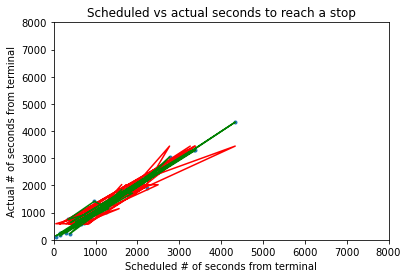

In [13]:
plt.scatter(X, Y, marker=".")
plt.plot(X, Y_1, color='red')
plt.plot(X, Y_2, color='green')
plt.title("Scheduled vs actual seconds to reach a stop")
plt.xlabel("Scheduled # of seconds from terminal")
plt.ylabel("Actual # of seconds from terminal")
plt.xlim([0, 8000])
plt.ylim([0, 8000])

<ipython-input-14-86576819ac7f>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


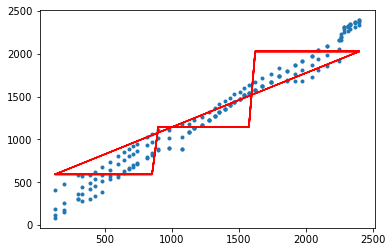

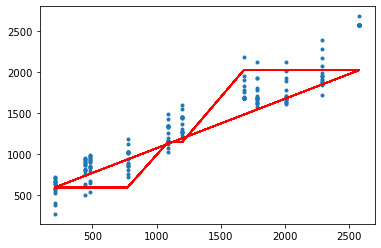

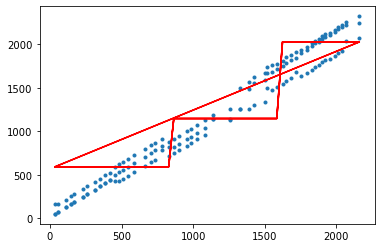

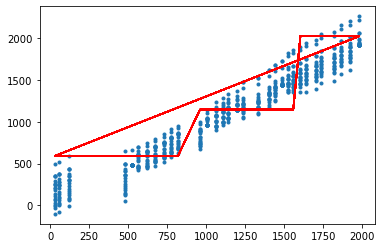

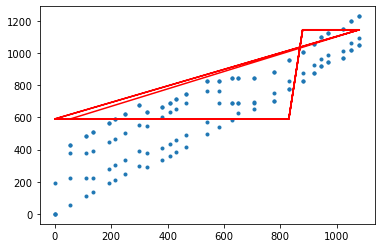

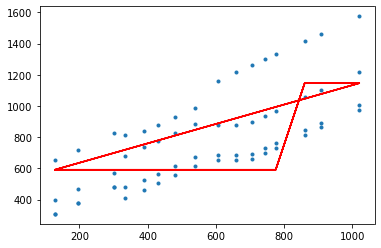

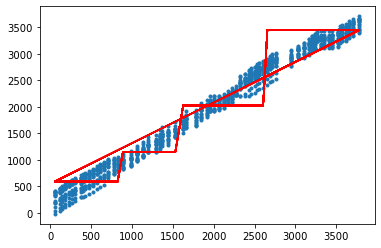

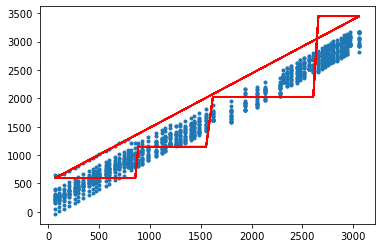

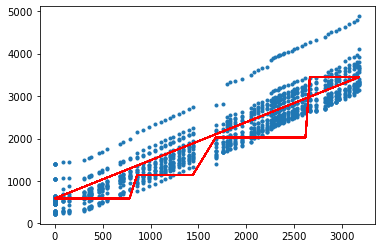

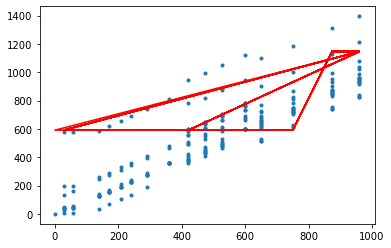

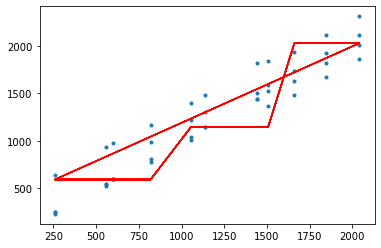

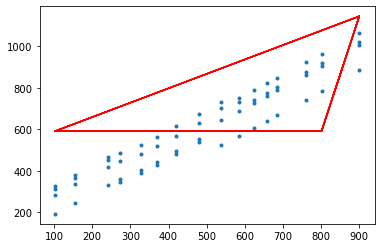

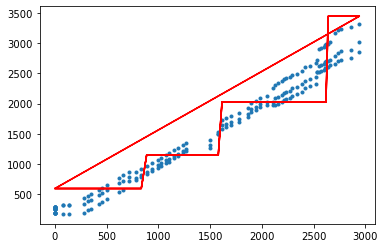

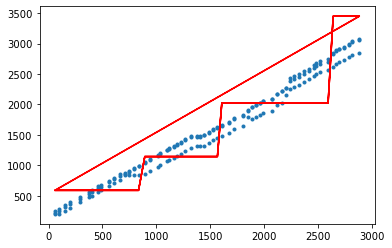

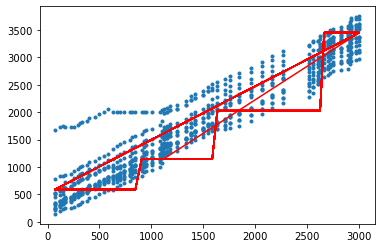

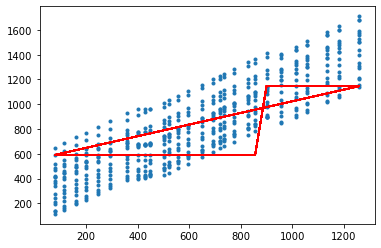

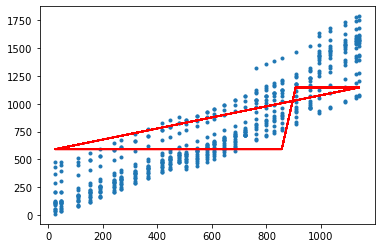

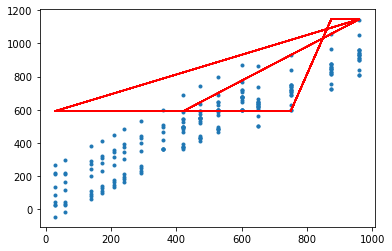

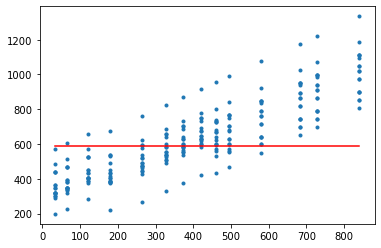

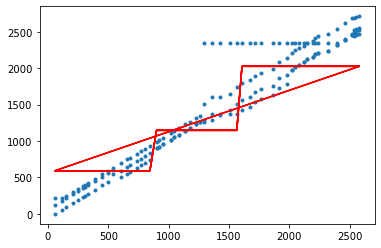

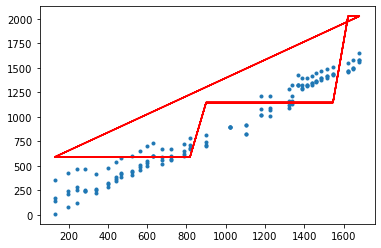

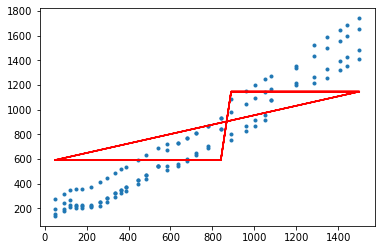

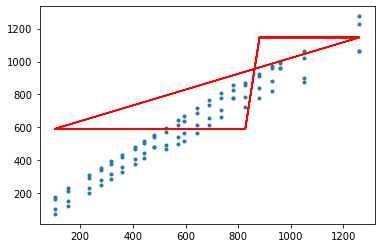

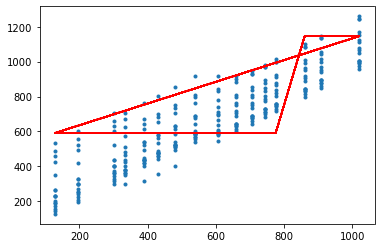

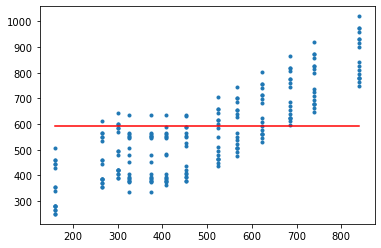

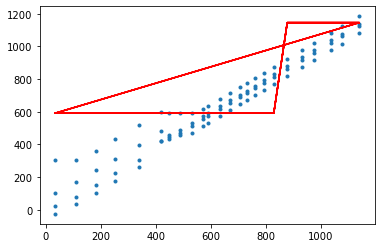

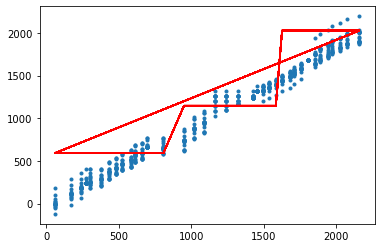

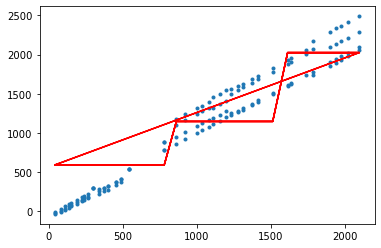

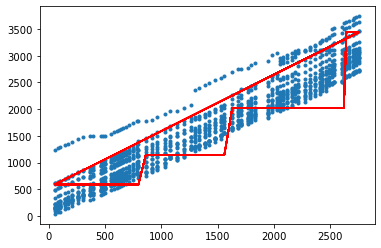

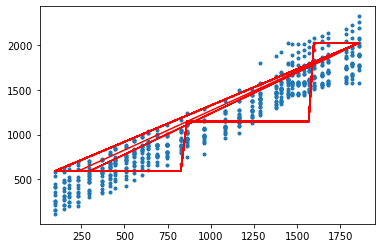

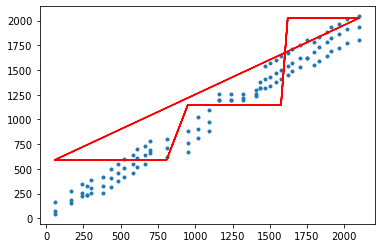

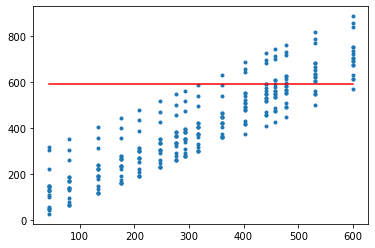

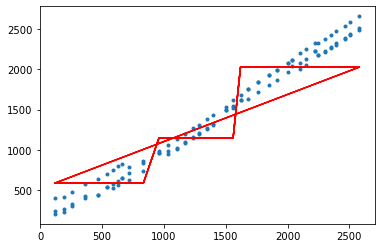

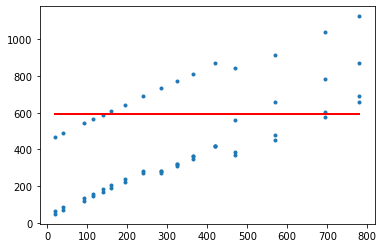

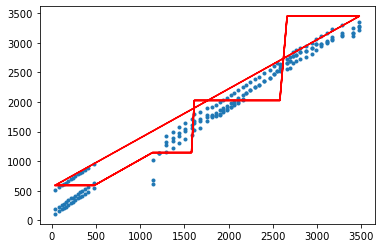

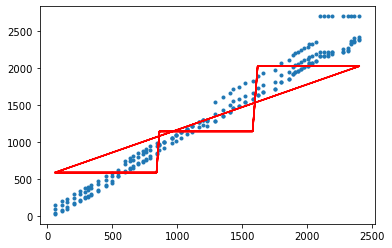

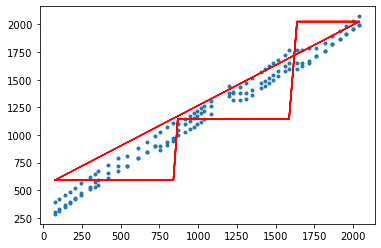

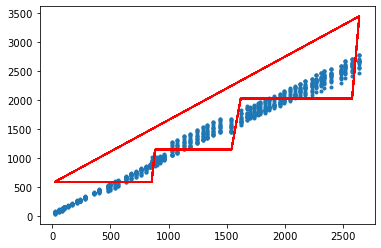

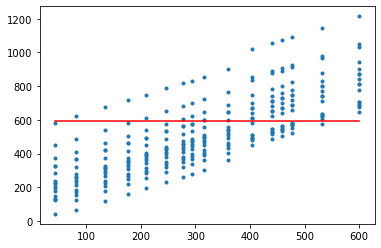

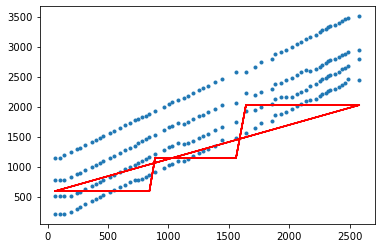

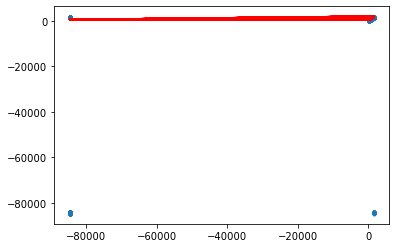

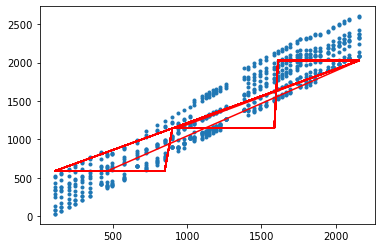

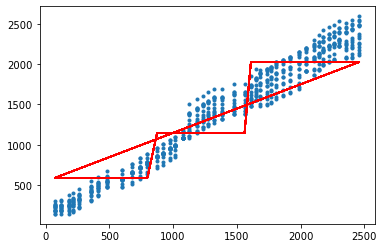

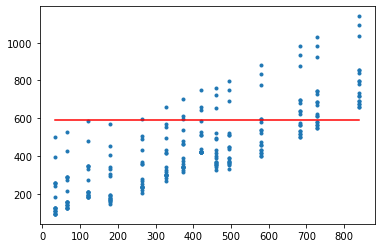

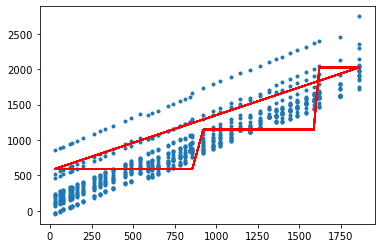

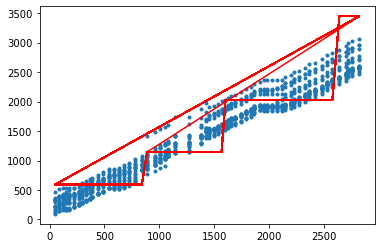

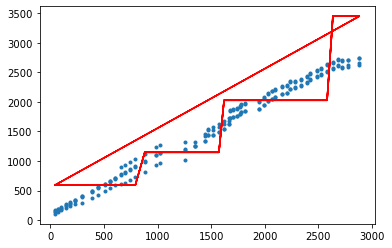

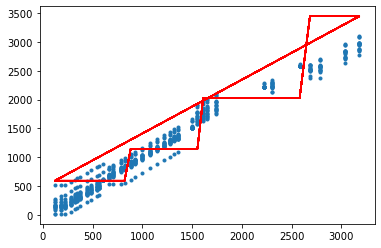

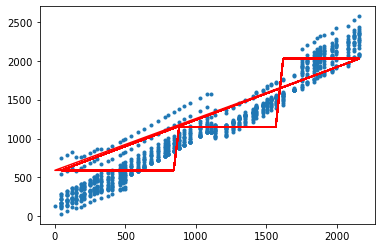

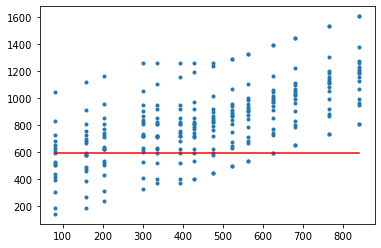

In [14]:
import random
trip_ids = df["trip_id"].unique()
for i in random.sample(range(len(trip_ids)), 50):
    cur_df = df.loc[(df['trip_id'] == trip_ids[i])]
    X = cur_df["scheduled_departure_time"].values.reshape(-1, 1)
    Y = cur_df["real_departure_time"].values.reshape(-1, 1)
    # We instead use the trained model based on the entire dataset
    # linear_regressor = LinearRegression()
    # linear_regressor.fit(X, Y)
    Y_pred = regr_1.predict(X)
    plt.figure(i)
    plt.scatter(X, Y, marker=".")
    plt.plot(X, Y_pred, color='red')